<h1>Problem Set 6</h1> 
<h3><center>Quantitative Macro</center></h3>



<center>Pau Belda-i-Tortosa</center> |


<center>November 2018</center>

<h3>Question 1: Initial values and exogenous process.</h3>

<h4>1.1: Initial values for value function.</h4>

*We have to come up with initial guess for different value functions of the type

$ v(k, \epsilon; \bar{k}, z_s)$

for $\epsilon= \{0,1\}$ and $s=\{good, bad\}$

assuming that:

- Agents expect that the individual and aggregate states $(\bar{k}, \epsilon, z)$ will not change in the future.

- *Agents' policy is such that $ g(k, \epsilon; \bar{k}, z)$ = k.*

<br/>


The **value function** boils down to the following expression:


(1) $ v(k, \epsilon; \bar{k}, z_s) = \underset{\{c, k'\}}{\max{}} \frac {c^{1-\gamma}-1}{1-\gamma}+ \beta  \mathbb{E} \big[v(k', \epsilon'; \bar{k'}, z_s')\big]$ 

where

(2) $c = w(\bar{k},z_s)\epsilon + (1+r(\bar{k},z_s)- \delta)k - g(\bar{k},z_s)$

<br/>

The technology is given by a **Cobb-Douglas** aggregate production function:

(3) $y = z\bar{k} ^{\alpha} l^{(1-\alpha)}$

<br/>

Then, from (2) we can recover factor prices: 

(3.1) $w(\bar{k},z_s)= (1-\alpha)z_s \big(\frac{\bar{k}}{l}\big)^\alpha$

(3.2) $r(\bar{k},z_s) = \alpha z_s \big(\frac{l}{\bar{k}}\big)^{1-\alpha}$

<br/>

Now, plug (3.2) and (3.1) in (2) and (2) in (1):

(1.1) $ v(k, \epsilon; \bar{k}, z_s) = \underset{\{k'\}}{\max{}} \frac {\big[\big((1-\alpha)z_s \big(\frac{\bar{k}}{l}\big)^\alpha\big) \epsilon + \big(1+\alpha z_s \big(\frac{l}{\bar{k}}\big)^{1-\alpha}- \delta\big)k - g(\bar{k},z_s)\big]^{1-\gamma}-1}{1-\gamma}+ \beta  \mathbb{E} \big[v(k', \epsilon'; \bar{k'}, z_s')\big]$

<br/>

What's next? Given our assumptions:
- $g(.) = k$
- $\mathbb{E} \big[v(k', \epsilon'; \bar{k'}, z_s')\big] = v(k, \epsilon; \bar{k}, z_s)$

(1.1.) reduces to: 

(1.2) $v(k, \epsilon; \bar{k}, z_s) = \frac {\big[\big((1-\alpha)z_s \big(\frac{\bar{k}}{l}\big)^\alpha\big) \epsilon + \big(\alpha z_s \big(\frac{l}{\bar{k}}\big)^{1-\alpha}- \delta\big)k \big]^{1-\gamma}-1}{(1-\gamma) (1-\beta)}$

<br/>

From (1.2) we can derive expressions for the value functions depending on both the idiosyncratic and aggregate shock: 

(1.3) $v(k, 1; \bar{k}, z_g) = \frac {\big[\big((1-\alpha)z_g \big(\frac{\bar{k}}{1-u_g}\big)^\alpha\big) + \big(\alpha z_g \big(\frac{1-u_g}{\bar{k}}\big)^{1-\alpha}- \delta\big)k \big]^{1-\gamma}-1}{(1-\gamma) (1-\beta)}$

<br/>

(1.4) $v(k, 0; \bar{k}, z_g) = \frac {\big[\big(\alpha z_g \big(\frac{1-u_b}{\bar{k}}\big)^{1-\alpha}- \delta\big)k \big]^{1-\gamma}-1}{(1-\gamma) (1-\beta)}$

<br/>

(1.5) $v(k, 1; \bar{k}, z_b) = \frac {\big[\big((1-\alpha)z_b \big(\frac{\bar{k}}{1-u_g}\big)^\alpha\big) + \big(\alpha z_b \big(\frac{1-u_g}{\bar{k}}\big)^{1-\alpha}- \delta\big)k \big]^{1-\gamma}-1}{(1-\gamma) (1-\beta)}$

<br/>

(1.6) $v(k, 0; \bar{k}, z_b) = \frac {\big[\big(\alpha z_b \big(\frac{1-u_b}{\bar{k}}\big)^{1-\alpha}- \delta\big)k \big]^{1-\gamma}-1}{(1-\gamma) (1-\beta)}$

<h3>Code for question 1 & 2</h3>

In [2]:
#Import packages
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from sympy.solvers.solveset import linsolve
import itertools as it
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)


#PARAMETERS
β=0.95
δ=0.025
γ=0.9
α=0.36
L = [0.9, 0.96]
z=[0.95, 1.05]

#TRANSITION MATRIX
π_11, π_12, π_13, π_14, π_21, π_22, π_23, π_24, π_31, π_32, π_33, π_34, π_41, π_42, π_43, π_44 = symbols ('π_11, π_12, π_13, π_14, π_21, π_22, π_23, π_24, π_31, π_32, π_33, π_34, π_41, π_42, π_43, π_44')


Π_1=linsolve([π_11 + π_12 + π_13 + π_14 -1, 
          π_21 + π_22 + π_23 + π_24 -1, 
          π_31 + π_32 + π_33 + π_34 -1, 
          π_41 + π_42 + π_43 + π_44 -1,
          π_21 + π_22 - 7/8,
          π_23 + π_24 - 1/8,
          π_43 + π_44 - 7/8,
          π_41 + π_42 - 1/8,
          π_33 + π_34 - 7/8,
          π_11 + π_12 - 7/8,
          π_31 + π_32 - 1/8,  
          π_13 + π_14 - 1/8,
          (0.04/(1/8))*π_31 + (0.96/(1/8))*π_41 - 0.1, 
          (0.04/(7/8))*π_33 + (0.96/(7/8))*π_43 - 0.04,
          (0.1/(7/8))*π_11 + (0.9/(7/8))*π_21 - 0.1,
          (0.1/(1/8))*π_13 + (0.9/(1/8))*π_23 - 0.1,
          π_31 - (1.25/7)*π_11,
          π_13 - (0.75/7)*π_33,
          π_43-0.005,
          π_21-0.02],
          (π_11, π_12, π_13, π_14, π_21, π_22, π_23, π_24, π_31, π_32, π_33, π_34, π_41, π_42, π_43, π_44))


Π_1= np.asarray(list(Π_1))
Π_1= np.reshape(Π_1, (4,4))




#State space
k0=np.arange(0,5,0.2)
k1=np.arange(5.3,50,0.6)
k=np.concatenate((k0,k1))
K=np.arange(16,18.5,0.5)


#STEP 1: Initial values for the Value Function
def V(k,K,i,j):
    return (np.log(((1-α)*z[j]*pow((K/L[j]),α)*i) + (((α*z[j]*pow((L[j]/K), 1-α))-δ)*k)))/ (1-β)

k1,K1=np.meshgrid(k,K)
V0b=np.transpose(V(k1,K1,0,0))
V0g=np.transpose(V(k1,K1,0,1))
V1b=np.transpose(V(k1,K1,1,0))
V1g=np.transpose(V(k1,K1,1,1))


# STEP 2: PERCEIVED LAW OF MOTION
#LOM functions
def H(Z,i):
    """It takes a specific value of aggregate capital 
    and productivity shock and returns the log of the 
    next period aggregate capital."""
    b0g=0
    b1g=1
    b0b=0
    b1b=1
    return np.exp((b0g+b1g*np.log(Z))*i + ((b0b+b1b*np.log(Z))*(1-i)))

def Ha(Z,i):
    min(abs(K - H(Z,i)))
    return K

#Feasible consumption for all possible combinations of states. 
def c(i,j,m,e,g):
    if ((1-α)*z[g]*pow((K[j]/L[g]),α)*e) + (((α*z[g]*pow((L[g]/K[j]), 1-α))-δ + 1)*k[i]) - k[m]>0:
        return np.log(((1-α)*z[g]*pow((K[j]/L[g]),α)*e) + (((α*z[g]*pow((L[g]/K[j]), 1-α))-δ + 1)*k[i]) - k[m])
    else:
        return -100000

C0g=np.empty((100,5,100))
C1g=np.empty((100,5,100))
C0b=np.empty((100,5,100))
C1b=np.empty((100, 5,100))
for i,I,m in it.product(range(100), range(5), range(100)):
    C0g[i,I,m]=c(i,I,m,0,1)
    C1g[i,I,m]=c(i,I,m,1,1)
    C1b[i,I,m]=c(i,I,m,1,0)
    C0b[i,I,m]=c(i,I,m,0,0)

In [3]:
V0gt=np.zeros((100,5))
V1gt=np.zeros((100,5))
V0bt=np.zeros((100,5))
V1bt=np.zeros((100,5))
count = 0
eps=0.00001
Dev=1
while Dev > eps: 
    for i,I in it.product(range(100), range(5)):
        j=np.argmin(abs(K - H(K[I],1)))
        V0gt[i,j]= max(C0g[i,j,:] + β*(((Π_1[2,0]*V0b[:,j]))+ (Π_1[2,1]*V1b[:,j])+(Π_1[2,2]*V0g[:,j])+(Π_1[2,3]*V1g[:,j])))
        V1gt[i,j] = max(C1g[i,j,:] + β*(((Π_1[3,0]*V0b[:,j]))+(Π_1[3,1]*V1b[:,j])+(Π_1[3,2]*V0g[:,j])+(Π_1[3,3]*V1g[:,j])))

        j=np.argmin(abs(K - H(K[I],0)))
        V0bt[i,j]=max(C0b[i,j,:] + β*(((Π_1[0,0]*V0b[:,j]))+
                               (Π_1[0,1]*V1b[:,j])+(Π_1[0,2]*V0g[:,j])+(Π_1[0,3]*V1g[:,j])))

        V1bt[i,j]=max(C1b[i,j,:] + β*(((Π_1[1,0]*V0b[:,j]))+
                               (Π_1[1,1]*V1b[:,j])+(Π_1[1,2]*V0g[:,j])+(Π_1[1,3]*V1g[:,j])))

        V0g=V0gt
        V1g=V1gt
        V0b=V0bt
        V1b=V1bt

        Diff0=abs(V0gt-V0g)
        dev0=Diff0.max()

        Diff1=abs(V1gt-V1g)
        dev1=Diff1.max()

        Diff2=abs(V0bt-V0b)
        dev2=Diff2.max()

        Diff3=abs(V1bt-V1b)
        dev3=Diff3.max()

        Dev=max(dev0, dev1, dev2, dev3)
        count+=1

The algorithm converges after 500 iterations.


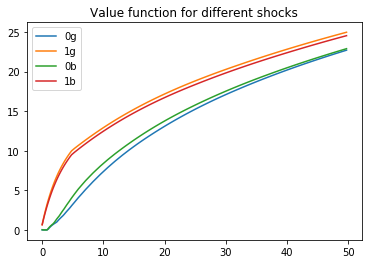

In [26]:
plt.plot(k,V0g[:,4], label='0g')
plt.plot(k,V1g[:,4], label='1g')
plt.plot(k,V0b[:,4], label='0b')
plt.plot(k,V1b[:,4], label='1b')
plt.title('Value function for different shocks')
plt.legend()
print('The algorithm converges after 500 iterations.')

In [8]:
#Get the policy functions
G0g=np.zeros((100,5))
G1g=np.zeros((100,5))
G0b=np.zeros((100,5))
G1b=np.zeros((100,5))
for i,I in it.product(range(100), range(5)):
    j=np.argmin(abs(K - H(K[I],1)))
    G0g[i,j]= np.argmax(C0g[i,j,:] + β*(((Π_1[2,0]*V0b[:,j]))+ (Π_1[2,1]*V1b[:,j])+(Π_1[2,2]*V0g[:,j])+(Π_1[2,3]*V1g[:,j])))
    G1g[i,j] = np.argmax(C1g[i,j,:] + β*(((Π_1[3,0]*V0b[:,j]))+(Π_1[3,1]*V1b[:,j])+(Π_1[3,2]*V0g[:,j])+(Π_1[3,3]*V1g[:,j])))

    j=np.argmin(abs(K - H(K[I],0)))
    G0b[i,j]=np.argmax(C0b[i,j,:] + β*(((Π_1[0,0]*V0b[:,j]))+
                           (Π_1[0,1]*V1b[:,j])+(Π_1[0,2]*V0g[:,j])+(Π_1[0,3]*V1g[:,j])))

    G1b[i,j]=np.argmax(C1b[i,j,:] + β*(((Π_1[1,0]*V0b[:,j]))+
                           (Π_1[1,1]*V1b[:,j])+(Π_1[1,2]*V0g[:,j])+(Π_1[1,3]*V1g[:,j])))

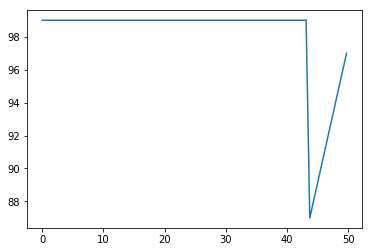

In [24]:
plt.plot(k,G1g[:,4])


For some reason the policy functions are not working properly. It seems like the budget constraint is not constraining the possibilities of tomorrow's capital and then the agent goes directly to accumulate the maximum amount possible of assets immediately. I'm working to fix it. 